## Musical Delay

Algorithm could be drew as following diagram:


<img align="center" width=50% src="musical_delay.png" alt>


The total delay line length is $M_1$ samples and the output will be feeded back to the input after a $b_0$ gain unit, the equation of the feedback musical delay loop by inspection is

$$
w(n) = x(n) + y(n) \tag{1.1}
$$

$$
b_0 w(n-M) = y(n) \tag{1.2}
$$

with equation $1.1$, $1.2$, we can transfer both of them into Z-domain:

$$
W(z) = X(z) + Y(z) \tag{2.1}
$$

$$
b_0 W(z)z^{-M} = Y(z) \tag{2.2}
$$

then we can eliminate $W(z)$ by $2.1$, $2.2$:

$$
b_0 (X(z) + Y(z)) z^{-M} = Y(z) \tag{3}
$$

$$
b_0 X(z) z^{-M} + b_0 Y(z) z^{-M} = Y(z) \tag{4}
$$

$$
b_0 X(z) z^{-M} = Y(z) (1 - b_0 z^{-M}) \tag{5}
$$

Finall, we can get the corresponding transfer function of the feedback musical delay:

$$
H(z) = \frac{Y(z)}{X(z)} = \frac{b_0 z^{-M}}{1-b_0 z^{-M}} \tag{6}
$$

In [1]:
from math import pi
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

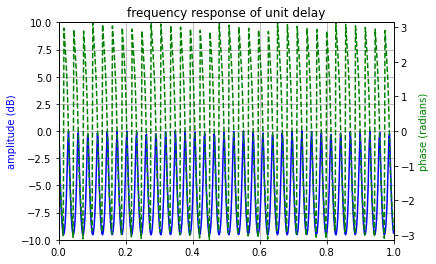

In [2]:
gain = 0.5
delay = 44101

numerator = np.zeros(delay+1)
numerator[delay] = gain

denominator = np.zeros(delay+1)
denominator[0] = 1
denominator[delay] = -gain

w, h = scipy.signal.freqz(numerator, denominator)
amp = 20 * np.log10(abs(h))
deg = np.angle(h)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

plt.title('frequency response of unit delay')
plt.xlabel(r'normalized frequency (x$\pi$rad/sample)')

ax1.plot(w/max(w), amp, 'b')
ax1.set_xlim(0, 1)
ax1.set_ylim(-10, 10)
ax1.set_ylabel('amplitude (dB)', color='b')
ax1.grid()

ax2.plot(w/max(w), deg, 'g--')
ax2.set_xlim(0, 1)
ax2.set_ylim(-pi, pi)
ax2.set_ylabel('phase (radians)', color='g')

plt.show()